In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
import random
from sklearn.linear_model import LinearRegression, LogisticRegression
from tabulate import tabulate
import pylab

In [52]:
df = pd.read_csv("/content/cleaned_data.csv")
df['Debtor'] = df['Debtor'].map({'Yes': 1, 'No': 0})
df['Scholarship holder'] = df['Scholarship holder'].map({'Yes': 1, 'No': 0})
df

,Application order,Daytime/evening attendance,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International,Gender
0,5,1,20,0,0,0,0,0.000000,0,0,...,Other—11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,Yes,No,0,Yes,0,No,Male
1,1,1,19,0,6,6,6,14.000000,0,0,...,Higher Education—degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,Yes,No,0,No,0,No,Male
2,5,1,19,0,6,0,0,0.000000,0,0,...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,Yes,No,0,No,0,No,Male
3,2,1,20,0,6,8,6,13.428571,0,0,...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,Yes,No,0,Yes,0,No,Female
4,1,0,45,0,6,9,5,12.333333,0,0,...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,No,No,0,Yes,0,No,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,1,19,0,6,7,5,13.600000,0,0,...,Secondary Education—12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",Administrative staff,No,No,0,Yes,0,No,Male
4420,2,1,18,0,6,6,6,12.000000,0,0,...,Secondary Education—12th Year of Schooling or ...,Unskilled Workers,Unskilled Workers,Yes,No,1,No,0,Yes,Female
4421,1,1,30,0,7,8,7,14.912500,0,0,...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,Yes,No,0,Yes,1,No,Female
4422,1,1,20,0,5,5,5,13.800000,0,0,...,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",Administrative staff,Yes,No,0,Yes,1,No,Female


Part A:

1)
Research Question:

we will use these explanatory varibales:

1.Debtor (discrete)

2.Curricular units 1st sem - grade (continuous)

3.GDP

the explained varibale is:

Curricular units 2nd sem (grade): , that is a continuous variable

The question is:

what is the effect of Age at enrollment, Curricular units 1st sem grade and GDP on Curricular units 2nd sem (grade)?

In [ ]:
np.random.seed(1)
sampled_data=df.sample(n=200)
## taking only the columns we are working with
covariates=sampled_data[['Debtor','Curricular units 1st sem (grade)','GDP']]
Y=sampled_data['Curricular units 2nd sem (grade)']
covariates_np=covariates.to_numpy()

2) Data Analysis:
Let's begin by examining the continuous variables: Curricular units 1st sem (grade), GDP, Curricular units 2nd sem (grade), We'll start by presenting key statistical metrics. Subsequently, we'll utilize a box plot to visually represent these statistical measures. Additionally, we'll plot histograms to provide insights into the overall characteristics of each variable's distribution. The box plot helps in visualizing the summary statistics from the table, while the histograms offer a visual representation of the underlying distribution patterns of the variables.

In [ ]:
continuous_variables = ['Curricular units 1st sem (grade)','GDP','Curricular units 2nd sem (grade)']
statistical_data = sampled_data[continuous_variables].describe(percentiles=[0.25, 0.5, 0.75]).round(2)[1:]
statistical_data

,Curricular units 1st sem (grade),GDP,Curricular units 2nd sem (grade)
mean,11.48,0.26,10.98
std,4.22,2.30,4.61
min,0.00,-4.06,0.00
25%,11.58,-1.70,11.33
50%,12.67,0.79,12.42
75%,13.69,1.79,13.33
max,18.88,3.51,17.69


3)
a.

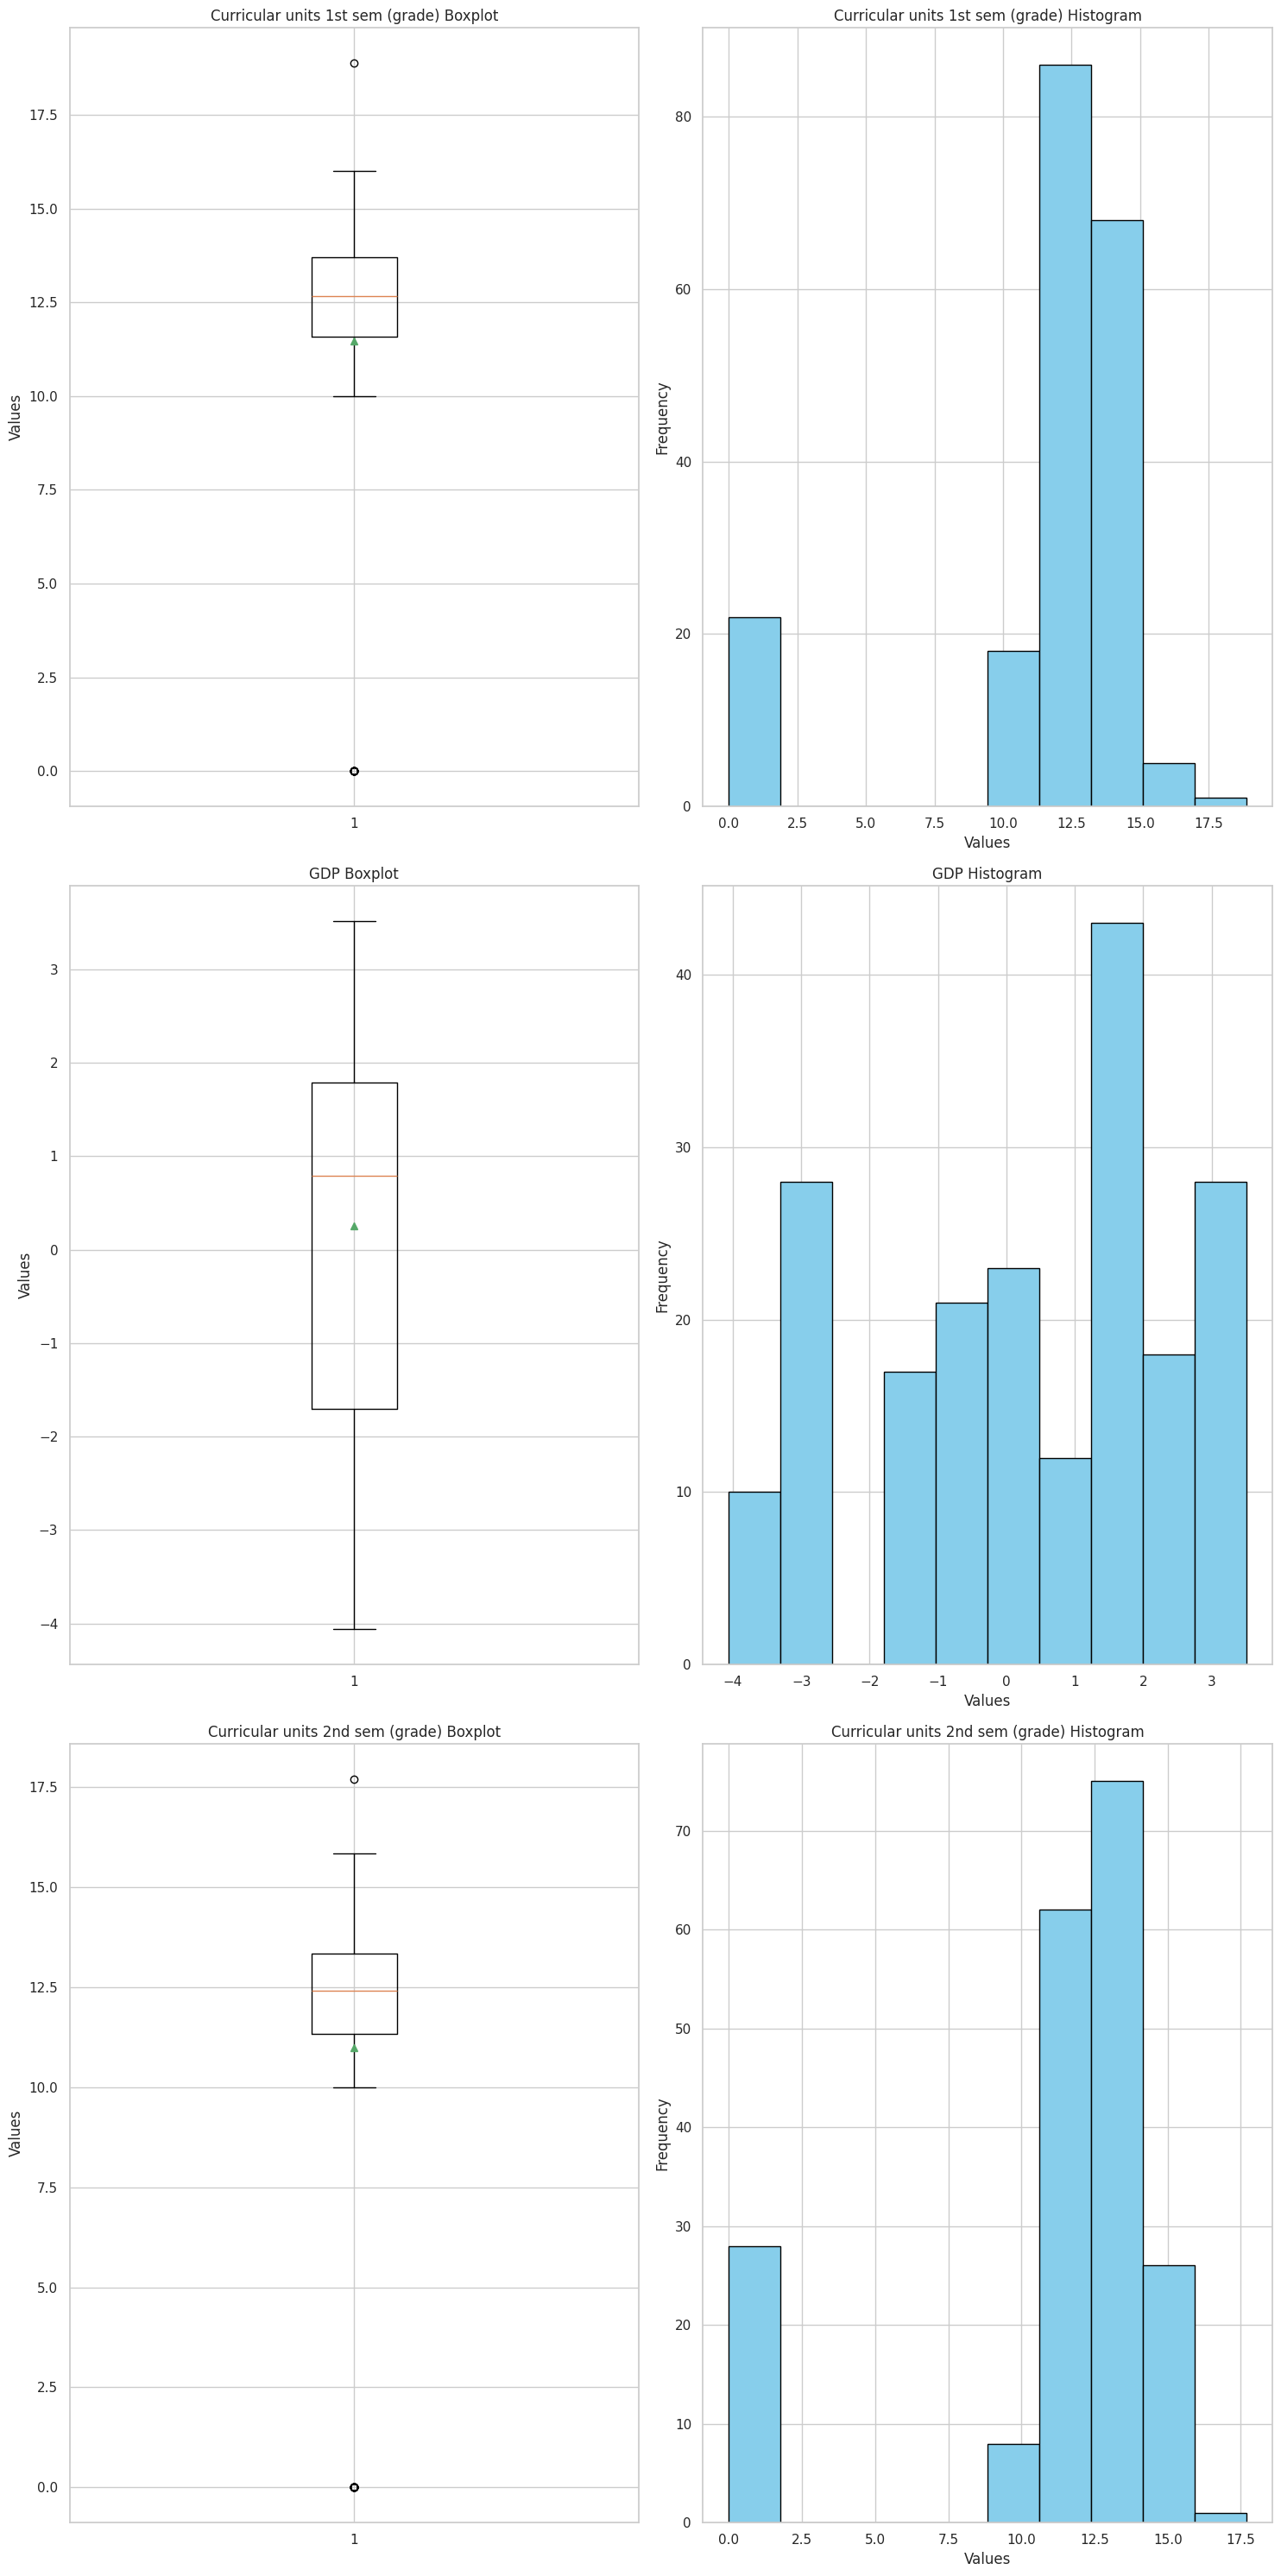

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 30))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(continuous_variables):
    # Boxplot
    axes[i, 0].boxplot(sampled_data[column], showmeans = True)
    axes[i, 0].set_title(f"{column} Boxplot")
    axes[i, 0].set_ylabel("Values")

    # Histogram
    axes[i, 1].hist(sampled_data[column],color='skyblue',ec="black", bins=10)
    axes[i, 1].set_title(f"{column} Histogram")
    axes[i, 1].set_xlabel("Values")
    axes[i, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

explanation of the histograms and boxplots:

We are representing each continuous variable histogram and boxplot to better understand the distribution of the data,as we see in each boxplot there is outliers so we also chose to represent the data in a histogram to get a better visualization of the data.

we will represent the Age at enrollment column data in a barplot:

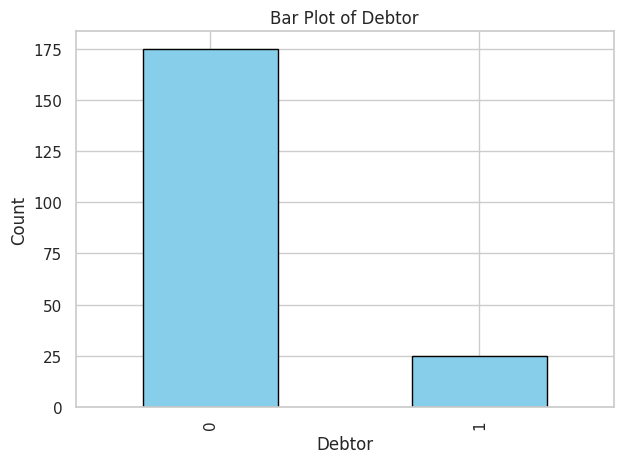

In [ ]:
# Categorical variable for which we want to create visualizations
categorical_variable = ['Debtor']

# Count the frequency of each category
category_counts = sampled_data[categorical_variable[0]].value_counts()


# Create a bar plot
category_counts.plot(kind='bar', color='skyblue' ,ec="black")
plt.title(f"Bar Plot of {categorical_variable[0]}")
plt.xlabel(categorical_variable[0])
plt.ylabel("Count")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

explanation of the barplot:

as we see in the barplot most of the records in the sampled data are not Debtors

b.

**Missing values:**

in our data we don't have any missing values as we can see in the data table (there is no None, Null or blank, and there is no 0 age of enrolment), and as we can see from the data source that it was cleaned.

**checking for outliers:**

as we see in the boxplots there are outliers in the three continuous variables we chose to work with ,we want to check the percentage of the outliers from the whole sampled data:

In [ ]:
num_records = len(sampled_data)
for column in continuous_variables:
    q1 = statistical_data[column]["25%"]
    q3 = statistical_data[column]["75%"]
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    col = sampled_data[column]
    lower_outliers = col[(col <= lower_bound)]
    upper_outliers = col[(col >= upper_bound)]
    print(f'Number of low outliers for the variable {column} is {len(lower_outliers)} which are roughly {len(lower_outliers) :.2f}% of the total records')
    print(f'Number of high outliers for the variable {column} is {len(upper_outliers)} which are roughly {len(upper_outliers) :.2f}% of the total records')
    print("***")

Number of low outliers for the variable Curricular units 1st sem (grade) is 22 which are roughly 22.00% of the total records
Number of high outliers for the variable Curricular units 1st sem (grade) is 1 which are roughly 1.00% of the total records
***
Number of low outliers for the variable GDP is 0 which are roughly 0.00% of the total records
Number of high outliers for the variable GDP is 0 which are roughly 0.00% of the total records
***
Number of low outliers for the variable Curricular units 2nd sem (grade) is 28 which are roughly 28.00% of the total records
Number of high outliers for the variable Curricular units 2nd sem (grade) is 1 which are roughly 1.00% of the total records
***


as we see the percentage of outliers in all three continuous variables are very low compareed to the size of the sample data, excpet for the values that is considered as high values for the variable Curricular units 2nd sem (grade) feature.





**symmetry and distribution of the variables we work with based on the histograms and the barplot above:**

Curricular units 1st sem (grade):

1.as we can see it is not symmetric

2.based on the general shape of the histogram we think that the distribution is normal distribution with mue and sigma (mean and variance).

GDP:

1.as we can see it is not symmetric

2.based on the general shape of the histogram we think that the distribution is gamma

Curricular units 2nd sem (grade):

1.clearly it is not symmetric

2.the distribution might be gamma with large values of 𝛂 and β .(since we see that most of the values in the right side of the histogram).

Debtor :

we note that this is a binary discrete variable,so it is distributed Ber(p), this distribution is symmetrical iff p=0.5.we do not know p but we can estimate it to be the proportion of people with 1 in the column from the total samples, from the barplot above we can see clearly that p not equal to 0.5, thus it is not symmetrical

c.

Text(0.5, 1.0, 'the Curricular units 2nd sem (grade) as a function of the Curricular units 1st sem (grade)')

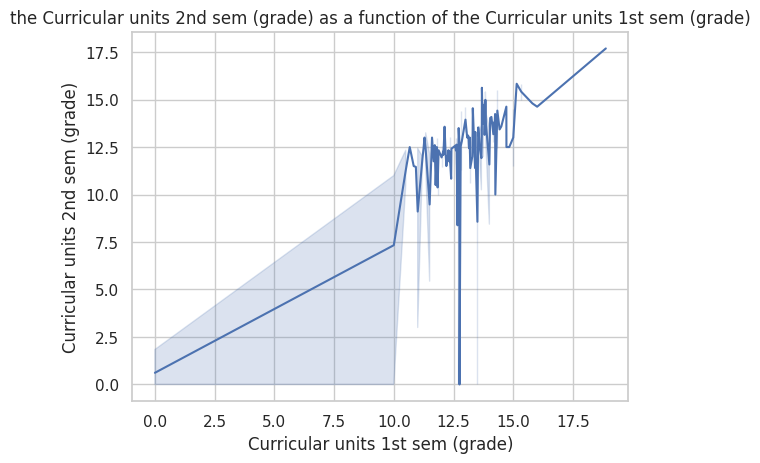

In [ ]:
plt1=sns.lineplot(data=sampled_data,x='Curricular units 1st sem (grade)',y='Curricular units 2nd sem (grade)')
plt.title('the Curricular units 2nd sem (grade) as a function of the Curricular units 1st sem (grade)')

Text(0.5, 1.0, 'the Curricular units 2nd sem (grade) as a function of the GDP')

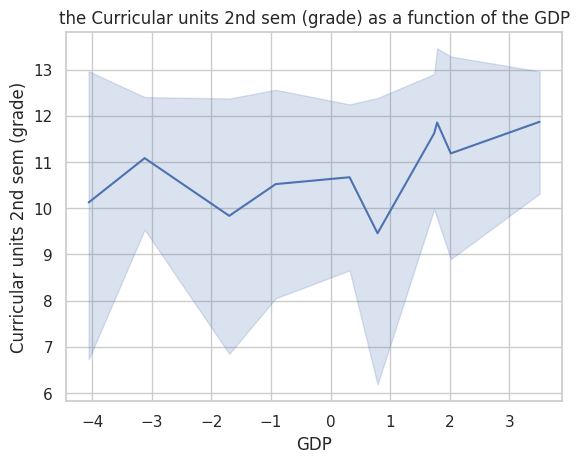

In [ ]:
plt2=sns.lineplot(data=sampled_data,x='GDP',y='Curricular units 2nd sem (grade)')
plt.title('the Curricular units 2nd sem (grade) as a function of the GDP')

Explanation:

since we expect linear relation between the explanatory variables and the explained variable thus we wanted to represent it in a linear graph.

We used sns library for this graph for better visualization of the graph. The shaded blue describes the location of points in the data, the line gives a approximated mean of the value of y given x to give a cleaner representation of the graph.

the first graph which describes the Curricular units 2nd sem (grade) as a function of the Curricular units 1st sem (grade) we see that the line is not monotinicso it do not clearly display a strong relation between X and Y.

the second graph which describes the Curricular units 2nd sem (grade) as a function of GDP ,it is not monotinic it do not clearly display a strong relation between X and Y.

So we can't actually, define which variable has the bigger influence on the variable BMI, but we know according to the definition of the BMI, that the Height take a part of it, so we assume that it will take a bigger influence on the BMI.

d.

we will display the Curricular units 2nd sem (grade) as a function of Debtor:

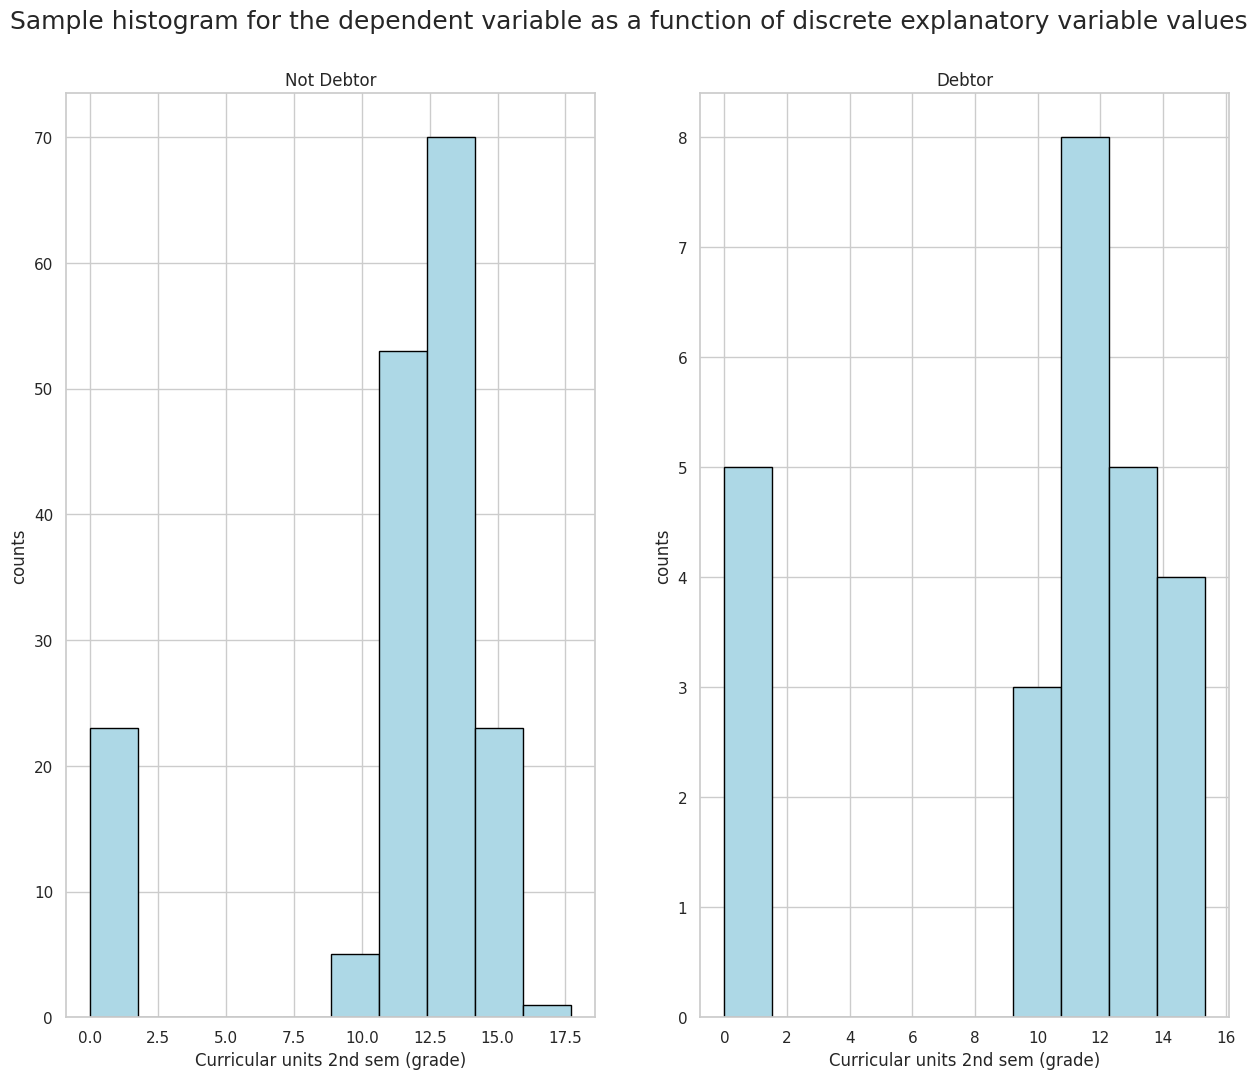

In [ ]:
def check(value):
  if value==1:
    return 'Debtor'
  else:
    return 'Not Debtor'

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Sample histogram for the dependent variable as a function of discrete explanatory variable values", fontsize=18, y=0.95)

categ = sampled_data['Debtor'].unique()
nc = math.ceil(len(categ)/2)
nrows=nc
ncols=2


for n, c in enumerate(categ):
  data = sampled_data[sampled_data['Debtor']==c]['Curricular units 2nd sem (grade)']
  ax = plt.subplot(nrows, ncols, n + 1)
  data.hist(ax=ax, bins=10, ec="black", color="lightblue")
  ax.set(ylabel="counts", xlabel='Curricular units 2nd sem (grade)',title=check(c))
plt.show()

explanation of the graphs:

we displayed the Curricular units 2nd sem (grade) of the debtor people and not debtor in two different histograms to clearly see the distibution of the Curricular units 2nd sem (grade) values.

4)

In [ ]:
reg=LinearRegression(fit_intercept=True).fit(covariates_np, Y)
beta=[reg.intercept_,*reg.coef_]
## where the first element in beta is the intercept
print('beta estimator is:')
print(beta)
print('the intercept is:')
print(reg.intercept_)
print('the Coefficients are:')
print(*reg.coef_)


beta estimator is:
[0.8857923440696975, -1.5433801118815265, 0.8937776565145306, 0.10663307981827808]
the intercept is:
0.8857923440696975
the Coefficients are:
-1.5433801118815265 0.8937776565145306 0.10663307981827808


Debtor: -1.5433801118815265

A negative coefficient indicates that being a debtor (when the Debtor variable is 1) decreases the predicted value of the dependent variable by approximately 1.54 units compared to not being a debtor (when Debtor is 0), holding all other variables constant.


Curricular units 1st sem (grade): 0.8937776565145306

A positive coefficient means that for each unit increase in the "Curricular units 1st sem (grade)" variable, the predicted value of the dependent variable increases by approximately 0.89 units, holding all other variables constant.


GDP: 0.10663307981827808

A positive coefficient here suggests that for each unit increase in GDP, the predicted value of the dependent variable increases by approximately 0.11 units, holding all other variables constant.

5)

F Test: (as we saw in the lecture)
$$H_0: β^*_1=β^*_2=β^*_3= 0$$

$$H_1: ∃β^*_j ≠ 0, j∈ 1,2,3$$

$$T.S: F = \frac{MS_R}{MS_Res}$$

$$R.R: F > F_{(3, 196), 0.95}$$

In [ ]:
pd.set_option("expand_frame_repr", True)
mean_y = sum(Y) / len(Y)
source = ["SSR", "SSE", "SST"]

SSR = sum([(reg.predict([x])[0] - mean_y)**2 for x in covariates_np])
SSE = sum([(reg.predict([covariates_np[i]])[0] - Y.iloc[i])**2 for i in range(len(covariates_np))])
SST = sum([(true_label - mean_y)**2 for true_label in Y])
SS = [SSR, SSE, SST]

degrees_freedom = [covariates_np.shape[1], covariates_np.shape[0] - (covariates_np.shape[1] + 1), covariates_np.shape[0] - 1]

MS = [SSR / degrees_freedom[0], SSE / degrees_freedom[1], SST / degrees_freedom[2]]

alpha = 0.05
F = MS[0] / MS[1]
Pval = 1 - stats.f.cdf(F, degrees_freedom[0], degrees_freedom[1])

print("ANOVA Table")
table = [["Source", "Sum of Squares", "df", "MS", "F"],
         ['Regression', SSR, degrees_freedom[0] , MS[0], f"F = {F:.04}, p-val = {Pval:.04}"],
         ['Residuals', SSE ,  degrees_freedom[1], MS[1], ""],
         ['Total', SST,  degrees_freedom[2], MS[2], ""]]
print(tabulate(table, headers='firstrow', tablefmt='grid'))

ANOVA Table
+------------+------------------+------+-----------+-----------------------------+
| Source     |   Sum of Squares |   df |        MS | F                           |
+============+==================+======+===========+=============================+
| Regression |          2907.96 |    3 | 969.319   | F = 144.5, p-val = 1.11e-16 |
+------------+------------------+------+-----------+-----------------------------+
| Residuals  |          1314.59 |  196 |   6.70711 |                             |
+------------+------------------+------+-----------+-----------------------------+
| Total      |          4222.55 |  199 |  21.2188  |                             |
+------------+------------------+------+-----------+-----------------------------+


The p-value here is extremely small , which is much smaller than the typical significance level of 0.05.
Therefore, we reject the Null hypothesis that there is no linear relation between the Curricular units 2nd sem (grade) and the explanatory variables.
​
 .

In [ ]:
R_squared = SSR / SST
R_squared_adj = 1 - (degrees_freedom[2] / degrees_freedom[1]) * (1 - R_squared)

print("R_squared =", R_squared)
print("R_squared_adj =", R_squared_adj)

R_squared = 0.6886730520524094
R_squared_adj = 0.6839078436654564


6)

In [ ]:
# Calculate the CI for each feature.
sigma_epsilon_squared = MS[1]
covariates_w_1 = np.insert(covariates_np, 0, np.ones(covariates_np.shape[0]), axis=1)
C = np.linalg.inv(covariates_w_1.T @ covariates_w_1)
alpha=0.05
quantile = norm.ppf(1 - alpha / 2)

confidence_intervals = [[beta - quantile * (sigma_epsilon_squared * C[i][i]) ** 0.5,
                         beta +quantile * (sigma_epsilon_squared * C[i][i]) ** 0.5]
                        for i, beta in enumerate([reg.intercept_] + list(reg.coef_))]

print("The CI for beta over the sampled data:")
for i, feature in enumerate(["Intercept", 'Debtor','Curricular units 1st sem (grade)','GDP']):
    print(f"The beta_{feature} CI is", confidence_intervals[i])

The CI for beta over the sampled data:
The beta_Intercept CI is [-0.16488795178278992, 1.936472639922185]
The beta_Debtor CI is [-2.6339802362485973, -0.4527799875144556]
The beta_Curricular units 1st sem (grade) CI is [0.808342930321948, 0.9792123827071131]
The beta_GDP CI is [-0.05088356476655534, 0.26414972440311146]


checking if the coeffecients estimators of the entire data are in their CI(based on 200 samples):

In [ ]:
X_all = np.array(df[['Debtor','Curricular units 1st sem (grade)','GDP']])
y_all = df["Curricular units 2nd sem (grade)"]
reg_all = LinearRegression(fit_intercept=True).fit(X_all, y_all)
print('the estimators on the entire data are:')
print("Intercept:", reg_all.intercept_)
print("Coefficents:", *reg_all.coef_)

print("----------------------------")
##in_CI is a boolean list with True if the estimator is in his CI interval
in_CI = []
for i, beta in enumerate([reg_all.intercept_] + list(reg_all.coef_)):
  if  confidence_intervals[i][0] <= beta <= confidence_intervals[i][1]:
    in_CI.append(True)
  else:
    in_CI.append(False)

for i, feature in enumerate(["Intercept", 'Debtor','Curricular units 1st sem (grade)','GDP']):
  if in_CI[i]:
    print(f"The beta_{feature} for all the data is in the confidence interval for beta we estimated ")
    print('for the sampled data')
  else:
    print(f"The beta_{feature} for all the data is not in the confidence interval for beta ")
    print('we estimated for the sampled data')

the estimators on the entire data are:
Intercept: 0.8343867719426683
Coefficents: -0.9065456557458359 0.8926713031834382 0.06873511502017698
----------------------------
The beta_Intercept for all the data is in the confidence interval for beta we estimated 
for the sampled data
The beta_Debtor for all the data is in the confidence interval for beta we estimated 
for the sampled data
The beta_Curricular units 1st sem (grade) for all the data is in the confidence interval for beta we estimated 
for the sampled data
The beta_GDP for all the data is in the confidence interval for beta we estimated 
for the sampled data


We got that the all the estimated parameters for the whole data are in the relevant CIs, so we conclude that the sample we have did approximated the behaviour of the data well enough, although it was a small sample of the data.

7)

$$H_0: β_j = 0$$
$$H_1: β_j \not= 0$$
$$T.S: W = \frac{\hat{β_j}}{\hat{s.e(\hat{β_j})}}$$
$$R.R: |W| > Z_{α/2}$$

Where: $$\hat{s.e(\hat{β_j})} = (\hat{σ_j}^2 * (X^TX)^{-1}_{jj})^{1/2}$$

We do this test for each one of the beta estimators we have $$β^*_0, β^*_1, β^*_2, β^*_3$$

In [ ]:
reject=[]
alpha=0.05
z_quantile = norm.ppf(1 - alpha / 2)
for i, beta in enumerate([reg.intercept_] + list(reg.coef_)):
  test_statistic_beta=beta/ (sigma_epsilon_squared * C[i][i]) ** 0.5
  reject.append(abs(test_statistic_beta)>z_quantile)
for i, feature in enumerate(["Intercept", 'Debtor','Curricular units 1st sem (grade)','GDP']):
    if reject[i]:
      print(f'for beta_{feature} reject H0')
    else:
      print(f'for beta_{feature} do not reject H0')

for beta_Intercept do not reject H0
for beta_Debtor reject H0
for beta_Curricular units 1st sem (grade) reject H0
for beta_GDP do not reject H0


8)

In order to show that the linarity assumption holds we will check if there is similar spread around e=0 in the residual analysis plot and also we want to check if there is constant variance for the residual we will check this also using the residual analysis plot:

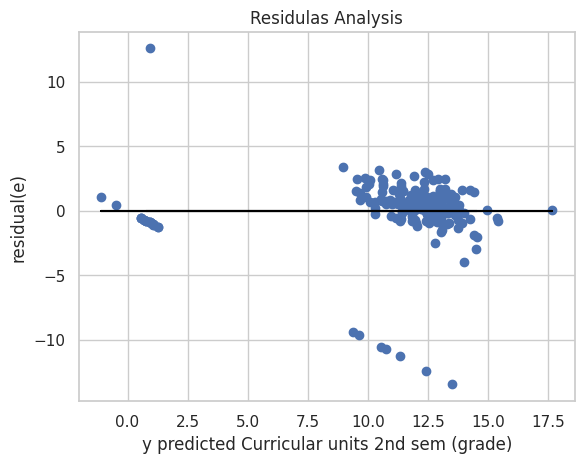

In [ ]:
coefs = np.array([reg.intercept_] + list(reg.coef_))
plt.scatter(covariates_w_1 @ coefs, Y - covariates_w_1 @ coefs)
plt.plot(covariates_w_1 @ coefs, np.zeros(len(Y)), c='black')
plt.title("Residulas Analysis")
plt.ylabel("residual(e)")
plt.xlabel("y predicted Curricular units 2nd sem (grade)")
plt.show()

as we can see in the plot there is similar spread of the residual around e=0 , but the variance is not constant, This is because, it seems that there is an impact of the x-values on the observed residual. Thus, the linearity assumption is not reasonable.

9)

In [ ]:
# remove the 200 sampled points and sample 1000 new ones
new_data = df.drop(list(sampled_data.index)).sample(n=1000)
new_data_np=new_data[['Debtor','Curricular units 1st sem (grade)','GDP']].to_numpy()
new_data_w_1=np.insert(new_data_np,0,np.ones(new_data.shape[0]),axis=1)
Y_pred=new_data_w_1@coefs
Y_sampled=new_data['Curricular units 2nd sem (grade)'].to_numpy()
res = Y_sampled-Y_pred
var_estimate = 1/(new_data_np.shape[0]-new_data_w_1.shape[1])*sum([x**2 for x in res])
Proportion = []
z_quantile = stats.norm.ppf(0.975)
for index, row in new_data.iterrows():
    """
    9.a
    """
    x_new = np.array([1, row["Debtor"], row["Curricular units 1st sem (grade)"], row["GDP"]])
    y_pred = x_new.T @ coefs
    """
    9.b +9.c
    """
    se = z_quantile * (var_estimate * (1 + x_new.T @ C @ x_new)) ** 0.5
    CI = [y_pred - se, y_pred + se]
    Proportion.append(CI[0] <= row["Curricular units 2nd sem (grade)"] <= CI[1])

print("Proportion of real predictions inside the CI's:", sum(Proportion) / len(Proportion))

Proportion of real predictions inside the CI's: 0.948


Proportion of real predictions inside the CI's: 0.948, which is very close to 0.95, as expected by the defnition of CI - as we saw in class, the probability of the true value to be contained in the CI is approximated by 0.95. Thus, the results fits the theory, and suggest that the data is approximately distributed normally, as we assumed when building the approximated CI.

Note that the distrbution of the new sample is not guranteed to be the same as the distrbution of the intial sample, which can affect our results.

10)

In [ ]:
sampled_data["12"] = sampled_data["Debtor"] * sampled_data["Curricular units 1st sem (grade)"]
sampled_data["13"] = sampled_data["Debtor"] * sampled_data["GDP"]
sampled_data["23"] = sampled_data["Curricular units 1st sem (grade)"] * sampled_data["GDP"]

new_model_data = np.array(sampled_data[["Debtor", "Curricular units 1st sem (grade)", "GDP", "12",
                                "13", "23"]])

newModel_X_w_1 = np.insert(new_model_data, 0, np.ones(new_model_data.shape[0]), axis=1)

NewModel_reg = LinearRegression(fit_intercept=True).fit(new_model_data, Y)

print(f"beta for the new model is")
print(np.array([NewModel_reg.intercept_] + list(NewModel_reg.coef_)))

beta for the new model is
[ 0.80989904 -0.41443752  0.90107275  0.04530751 -0.12192403  0.36748319
  0.00113042]


to choose the best model we will use model evaluation:

1) Mallow's cp statistics

2)AIC

Mallow's cp statistic :

In [ ]:
newModel_coefs = np.array([NewModel_reg.intercept_] + list(NewModel_reg.coef_))
NewModel_y_predict = newModel_X_w_1 @ newModel_coefs
R_train_estimated = np.sum((Y - NewModel_y_predict) ** 2)
print("New Model, Mallow's CP:", R_train_estimated + 2 * (len(newModel_coefs)-1) * R_train_estimated / (len(Y) - len(newModel_coefs)) )
print("Old model Mallow's CP:", SSE + 2 * (len(coefs)-1) * sigma_epsilon_squared)

New Model, Mallow's CP: 1377.1964901488222
Old model Mallow's CP: 1354.835976329381


AIC:

In [ ]:
reg_old = sm.OLS(Y,np.array(sampled_data[["Debtor", "Curricular units 1st sem (grade)", "GDP"]])).fit()
reg_NewModel = sm.OLS(Y,new_model_data).fit()
likelihood_model_old = -0.5 * (reg_old.aic)
likelihood_model_interaction = -0.5 * (reg_NewModel.aic)
aic_res = likelihood_model_old - len(reg.coef_)
aic_interaction_res = likelihood_model_interaction - len(NewModel_reg.coef_)
print(f"The AIC for the old model is: {aic_res}")
print(f"The AIC for the new model is: {aic_interaction_res}")

The AIC for the old model is: -479.467657522664
The AIC for the new model is: -483.78517127234693


According to the two evaluation methods we conclude that the New model, with interactions is not better. For Mallows cp we prefer the smaller result. While, for AIC we prefer the larger one. And the new model mallow's cp is higher and we get smaller result in the AIC.

# **Part B:**

**Research Question:**

we will use these explanatory varibales:

1.Curricular units 1st sem (grade) (continuous)

2.GDP (continuous)

3.Debtor (discrete)


the explained varibale is:

Scholarship holder , that is a binary variable

**the question is:**

what is the effect of the Curricular units 1st sem (grade), Age at enrollment , GDP on Scholarship holder


2)

In [82]:
np.random.seed(1)
sampled_data=df.sample(n=200)
##taking only the columns we are working with
covariates=sampled_data[['GDP','Curricular units 1st sem (grade)','Debtor']]
Y=sampled_data['Scholarship holder']
covariates_np=covariates.to_numpy()

3)

a.

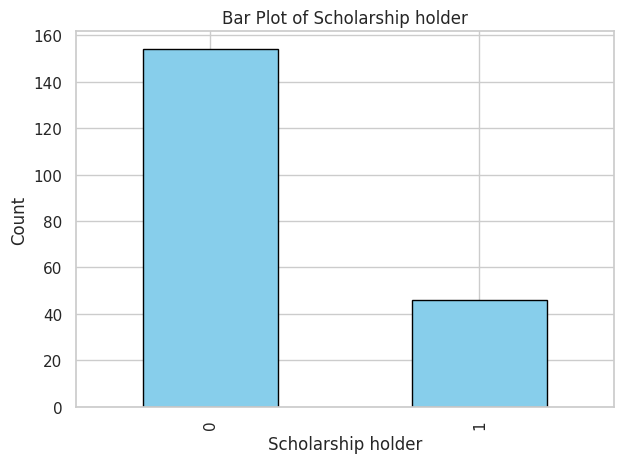

In [83]:
# Categorical variable for which we want to create visualizations
categorical_variable = ['Scholarship holder']

# Count the frequency of each category
category_counts = sampled_data[categorical_variable[0]].value_counts()


# Create a bar plot

category_counts.plot(kind='bar', color='skyblue' ,ec="black")
plt.title(f"Bar Plot of {categorical_variable[0]}")
plt.xlabel(categorical_variable[0])
plt.ylabel("Count")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

explanation of the bar plot:

as we see in the barplot most of the records in the sampled data are people that are not scholarship holders

Since the scholarship holder is the only new column the rest of the graphs and explanations are the same as in part A

b.

Missing Values:

we checked if there are missing values in the entire data and we saw that there is not missing values (since the data is cleaned (the original copy of the data)), thus in the sampled data that is sampled from the entire data there no missing values.

outliers:

the only new column we chose to work with is Scholarship holder and it is a binary column thus there is no outliers.

symmertric distribution:

since it's a discrete variable:

we note that this is a binary discrete variable,so it is distributed Ber(p), this distribution is symmetrical iff p=0.5. we do not know p but we can estimate it to be the proportion of people with 1 in the column from the total samples,from the barplot above we can see clearly that p not equal to 0.5, thus it is not symmetrical

c.

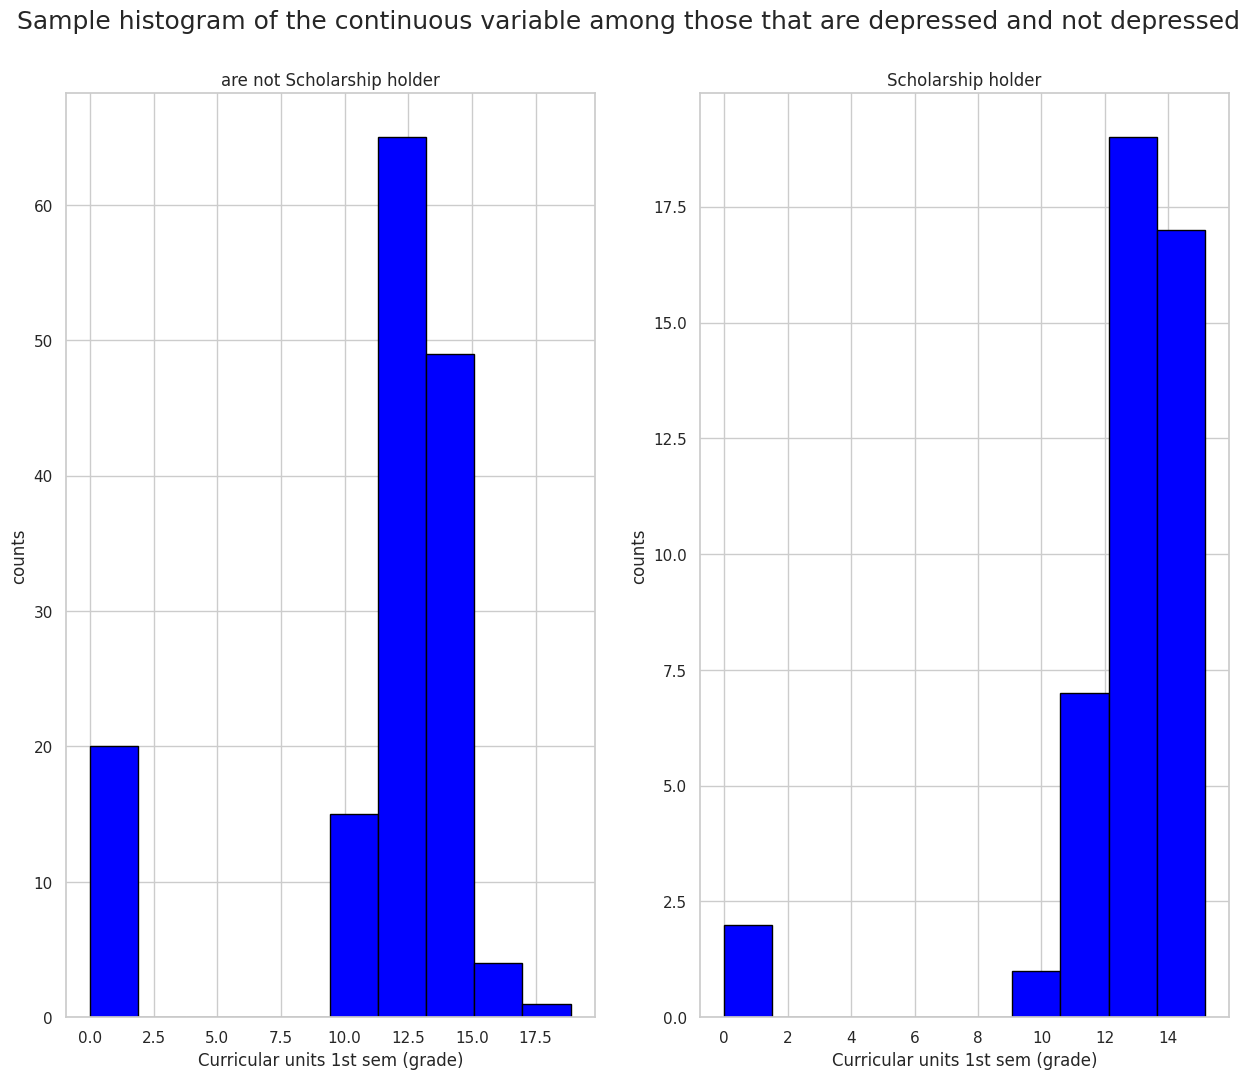

In [61]:
def check(value):
  if value==1:
    return 'Scholarship holder'
  else:
    return 'are not Scholarship holder'

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Sample histogram of the continuous variable among those that are Scholarship holder and not Scholarship holder", fontsize=18, y=0.95)

categ = sampled_data['Scholarship holder'].unique()
nc = math.ceil(len(categ)/2)
nrows=nc
ncols=2


for n, c in enumerate(categ):
  data = sampled_data[sampled_data['Scholarship holder']==c]['Curricular units 1st sem (grade)']
  ax = plt.subplot(nrows, ncols, n + 1)
  data.hist(ax=ax, bins=10, ec="black", color="blue")
  ax.set(ylabel="counts", xlabel='Curricular units 1st sem (grade)',title=check(c))
plt.show()

The histograms reveal that scholarship holders generally achieve higher and more consistent grades in the 1st semester, with most grades concentrated between 12 and 14. In contrast, non-scholarship holders show greater variability, with a significant number of grades near 0

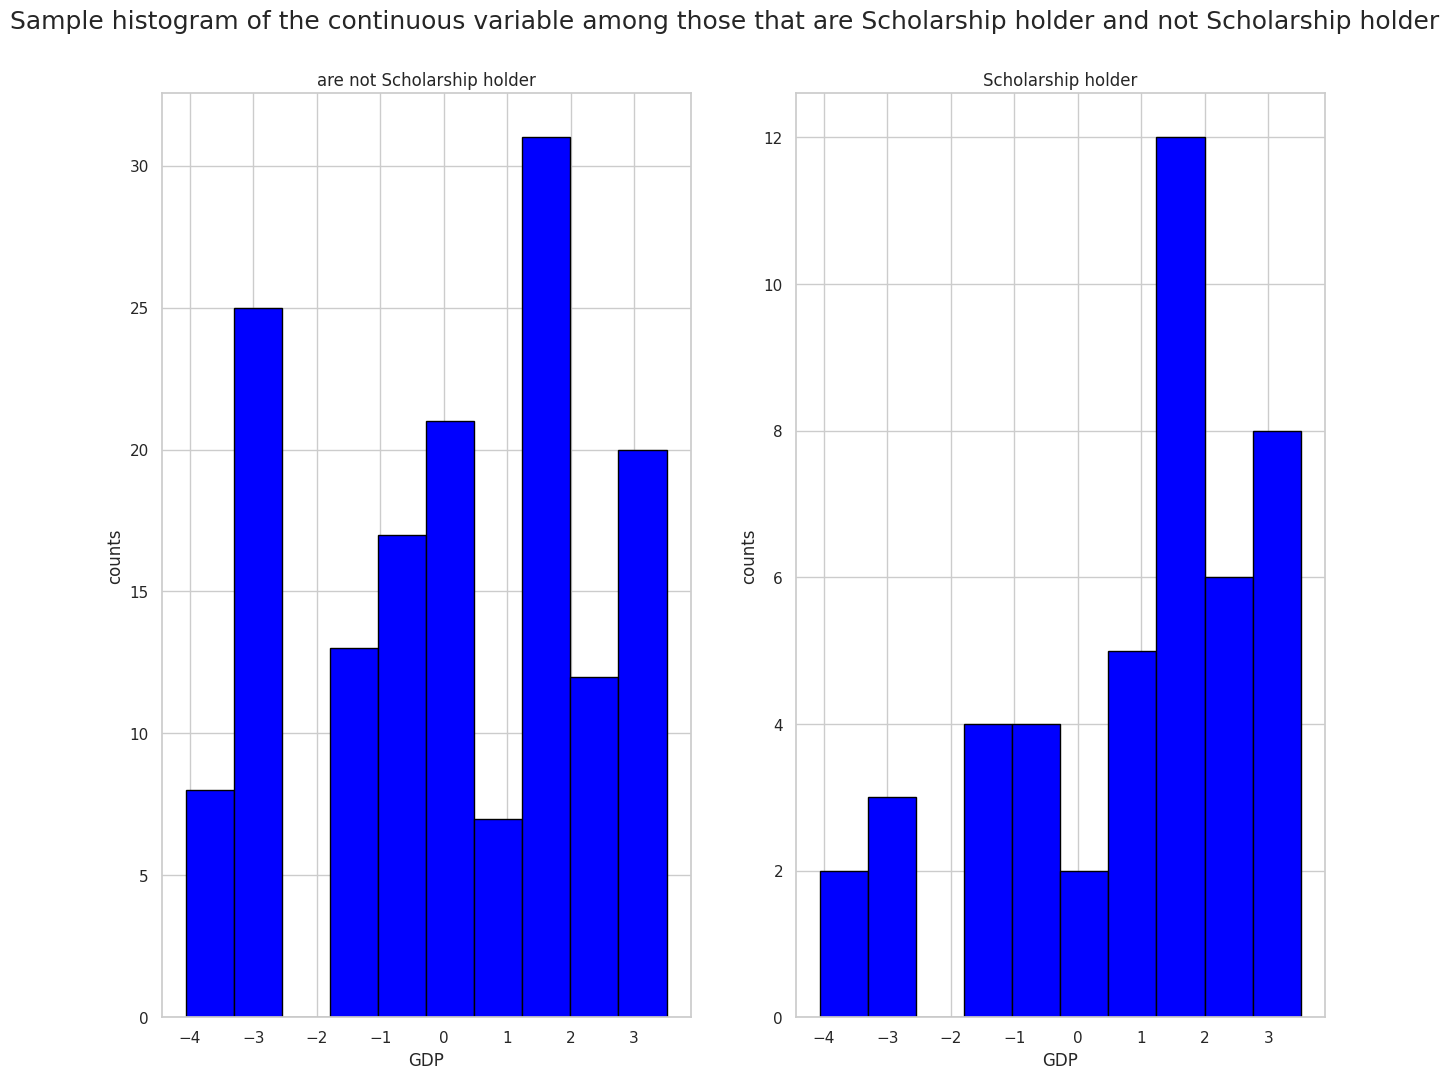

In [63]:
def check(value):
  if value==1:
    return 'Scholarship holder'
  else:
    return 'are not Scholarship holder'

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Sample histogram of the continuous variable among those that are Scholarship holder and not Scholarship holder", fontsize=18, y=0.95)

categ = sampled_data['Scholarship holder'].unique()
nc = math.ceil(len(categ)/2)
nrows=nc
ncols=2


for n, c in enumerate(categ):
  data = sampled_data[sampled_data['Scholarship holder']==c]['GDP']
  ax = plt.subplot(nrows, ncols, n + 1)
  data.hist(ax=ax, bins=10, ec="black", color="blue")
  ax.set(ylabel="counts", xlabel='GDP',title=check(c))
plt.show()

The histograms compare the GDP distribution for scholarship holders and non-scholarship holders. Scholarship holders (right) show a higher concentration of GDP in the positive range (1 to 3), indicating that they are more likely associated with higher GDP values. Non-scholarship holders (left) exhibit a wider and more even spread across the GDP range, with significant counts in both negative and positive values

4)

In [65]:
variables = ["Debtor", "Curricular units 1st sem (grade)", "GDP"]
X = np.array(sampled_data[variables])
X=np.insert(X,0,np.ones(X.shape[0]),axis=1)
Y = np.array(sampled_data["Scholarship holder"])
reg = LogisticRegression(penalty=None,fit_intercept=False).fit(X, Y)
coefs =reg.coef_
print('estimated beta is:')
print(coefs[0])
print('___________________')

print(f' If {variables[0]} will increase in one the log of OR will increase in : {math.exp(coefs[0][1]):.04}')
print(f' If {variables[1]} will increase in one the log of OR will increase in : {math.exp(coefs[0][2]):.04}')
print(f' If {variables[2]} will increase in one the log of OR will increase in : {math.exp(coefs[0][3]):.04}')



estimated beta is:
[-2.38532223 -0.04197388  0.09369637  0.13916703]
___________________
 If Debtor will increase in one the log of OR will increase in : 0.9589
 If Curricular units 1st sem (grade) will increase in one the log of OR will increase in : 1.098
 If GDP will increase in one the log of OR will increase in : 1.149


5)

In [66]:
def sigmoid(n):
  ''' sigmoid function '''
  return math.exp(n)/(1 + math.exp(n))

# X_w_1 = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
V = np.zeros((len(X), len(X)))

np_coefs = np.array(coefs[0])
for i, x in enumerate(X):
    V[i][i] = sigmoid(np_coefs @ x.T) * (1 - sigmoid(np_coefs @ x.T))

C = np.linalg.inv((X.T @ V @ X).astype('float'))
logistic_coefs_confidence_intervals = []

variables = ['0'] + variables
for i, coef in enumerate(coefs[0]):
    z_quantile = stats.norm.ppf(0.975)
    CI = [coef - z_quantile * C[i][i] ** 0.5, coef + z_quantile * C[i][i] ** 0.5]
    logistic_coefs_confidence_intervals.append(CI)
    print(f"beta_{variables[i]} CI:", CI)

beta_0 CI: [-3.7657194546405295, -1.004925007990584]
beta_Debtor CI: [-1.0495210700720625, 0.9655733083275516]
beta_Curricular units 1st sem (grade) CI: [-0.014387303281708425, 0.20178005238273947]
beta_GDP CI: [-0.01461640230701089, 0.2929504705957116]


In [67]:
X_full = np.array(df[["Debtor", "Curricular units 1st sem (grade)", "GDP"]])
X_full_w_1=np.insert(X_full,0,np.ones(X_full.shape[0]),axis=1)
y_full = np.array(df["Scholarship holder"])
reg_full = LogisticRegression(penalty=None,fit_intercept=False).fit(X_full_w_1, y_full)
coefs_full =reg_full.coef_
coefs_full=coefs_full[0]
in_CI = []
for i, beta in enumerate(coefs_full):
  if  logistic_coefs_confidence_intervals[i][0] <= beta<= logistic_coefs_confidence_intervals[i][1]:
    in_CI.append(True)
  else:
    in_CI.append(False)

for i, feature in enumerate(["Intercept", "Debtor", "Curricular units 1st sem (grade)", "GDP"]):
  if in_CI[i]:
    print(f"The beta_{feature} for all the data is in the confidence interval for beta we estimated for the sampled data ")
  else:
    print(f"The beta_{feature} for all the data is not in the confidence interval for beta we estimated for the sampled data ")

The beta_Intercept for all the data is in the confidence interval for beta we estimated for the sampled data 
The beta_Debtor for all the data is in the confidence interval for beta we estimated for the sampled data 
The beta_Curricular units 1st sem (grade) for all the data is in the confidence interval for beta we estimated for the sampled data 
The beta_GDP for all the data is in the confidence interval for beta we estimated for the sampled data 


We got that all the estimated parameters is in the relevant CIs.

6)

In [68]:
sampled_data["12"] = sampled_data["Curricular units 1st sem (grade)"] * sampled_data["Debtor"]
sampled_data["13"] = sampled_data["Curricular units 1st sem (grade)"] * sampled_data["GDP"]
sampled_data["23"] = sampled_data["Debtor"] * sampled_data["GDP"]

new_model_data = np.array(sampled_data[["Curricular units 1st sem (grade)", "Debtor", "GDP", "12",
                                "13", "23"]])
new_model_data_w_1=np.insert(new_model_data,0,np.ones(new_model_data.shape[0]),axis=1)
NewModel_reg = LogisticRegression(penalty=None,fit_intercept=False).fit(new_model_data_w_1, Y)
print(f"beta for the new model is")
New_model_coef=NewModel_reg.coef_
New_model_coef=New_model_coef[0]
print(New_model_coef)

beta for the new model is
[-2.37393506  0.08896864 -3.71444511  0.30705505  0.3239806  -0.00769786
 -0.49504217]


**likelihood ratio test:**
log likelihood:

$$H_0: β^∗_4=β^∗_5=β^∗_6=0$$

$$H_1: ∃ β^*_j ≠ 0, j∈ {4, 5, 6}$$

$$T.S.:λ=2(ln(βⁿ)−ln(β_0,n))$$

$$R.R.:λ>χ^2_{3,0.95}$$

In [69]:
# likelihood ratio test

def sigmoid_OldModel(x):
    return math.exp(np_coefs @ x.T) / (1+math.exp(np_coefs @ x.T) )

def sigmoid_NewModel(x):
    return math.exp(np.array(New_model_coef) @ x.T) / (1+math.exp(np.array(New_model_coef) @ x.T) )

t = 2 * sum([math.log(sigmoid_NewModel(new_model_data_w_1[i]) ** Y[i] * (1 - sigmoid_NewModel(new_model_data_w_1[i])) ** (1 - Y[i])) -
         math.log(sigmoid_OldModel(X[i]) ** Y[i] * (1 - sigmoid_OldModel(X[i])) ** (1 - Y[i])) for i in range(X.shape[0])])

if t > stats.chi2.ppf(0.95, 3):
    print("Reject H0,the model is : beta_0, beta_1, beta_2, beta_3, beta_12, beta_13, beta_23 (the new model)")
else:
    print("Do NOT reject H0, the model coeffecients are : beta_0, beta_1, beta_2, beta_3 (the old model)")

Do NOT reject H0, the model coeffecients are : beta_0, beta_1, beta_2, beta_3 (the old model)


we will use mallow's cp:

In [70]:
def pi_logistic(xi,beta):
  return np.exp((beta @ xi)) / (1+np.exp(beta@xi))
SSE =sum((Y[i] - pi_logistic(X[i],np_coefs))**2 for i in range(X.shape[0]))
p_new = new_model_data_w_1.shape[1]
n_new = new_model_data_w_1.shape[0]
SSE_new = sum([(Y[i] - pi_logistic(new_model_data_w_1[i],New_model_coef))**2 for i in range(new_model_data_w_1.shape[0])])

var_new = (1/(n_new-p_new))*SSE_new
var_old = (1/(X.shape[0]-X.shape[1]))*SSE
print("New Model, Mallow's CP:", SSE_new + 2 * (new_model_data_w_1.shape[1]-1) * var_new )
print("Old model Mallow's CP:", SSE + 2 * (X.shape[1]-1) * var_old)

New Model, Mallow's CP: 35.3751803689722
Old model Mallow's CP: 35.26176814771422


Since we want to minimize the mallow cp, we also should prefer the orginal model. In both tests we got the same result.

7)


for columns with string values we will replace each unique value to numbers from 0 until the number of different values

In [84]:
string_columns = df.select_dtypes(include=['object', 'string']).columns.tolist()
for col in string_columns:
  vars = sampled_data[col].unique()
  i = 0
  for var in vars:
    sampled_data[col].replace(var, i, inplace=True)
    i+=1

<ipython-input-84-82286fbc87d5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampled_data[col].replace(var, i, inplace=True)
<ipython-input-84-82286fbc87d5>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sampled_data[col].replace(var, i, inplace=True)


In [85]:
len(sampled_data.columns)

35

we have 38 column so there is no need to add more explanatory variables,

we want to caculate the variance on the full model:

In [94]:
X_full=sampled_data.to_numpy()
Y = np.array(sampled_data["Scholarship holder"])
X_full_w_1=np.insert(X_full, 0, np.ones(X_full.shape[0]), axis=1)
reg_full = LogisticRegression(penalty=None,fit_intercept=False,max_iter=10000)\
.fit(X_full_w_1,Y)
coefficients = reg_full.coef_
beta_full = coefficients[0]
full_SSE = sum([(Y[i]-pi_logistic(X_full_w_1[i],beta_full))**2 for i in range(X_full_w_1.shape[0])])
n = X_full.shape[0]
p = X_full_w_1.shape[1]
var_eps_full = (1/(n-p))*full_SSE
full_model_mallow = full_SSE + 2*(beta_full.shape[0]-1)*var_eps_full

reg_null = LogisticRegression(penalty=None, fit_intercept=False).fit(X_full_w_1[:,0].reshape(-1, 1),Y)
beta_null = reg_null.coef_[0]
e_null =sum([(Y[i] - pi_logistic(np.array([X_full_w_1[:,0][i]]),beta_null))**2 for i in range(X_full_w_1.shape[0])])
null_model_mallow = e_null

In [95]:
"""
we want to start with mallow's cp that is very high we try to find
 the lowest mallow's cp value by using forward stepwise regression
all_data: is all the data after adding the columns to the sampled_data and it is np array
"""

all_data=np.array(sampled_data)
all_data_w_1=np.insert(all_data, 0, np.ones(all_data.shape[0]), axis=1)
best_features_indices=[0]
changed_value=1
best_mallow_val=float('inf')
num_var =1
next_best_covs = [0]
n=all_data.shape[0]

while changed_value>0:
  current_mallow=best_mallow_val
  best_features_indices=next_best_covs
  curr_var=num_var+1
  ##we want to add the covariate that minimizes the mallow's cp in the current iteration
  for i in range(1,all_data_w_1.shape[1]):
   if i not in best_features_indices:
    column_indices = best_features_indices + [i]
    curr_data=all_data_w_1[:,column_indices]
    curr_reg=LogisticRegression(penalty=None,fit_intercept=False, max_iter=10000).fit(curr_data,Y)
    coefficients = curr_reg.coef_
    estimated_beta =coefficients[0]
    ##caculating mallow's cp
    curr_SSE=sum([(Y[i]-pi_logistic(curr_data[i],estimated_beta))**2 for i in range(curr_data.shape[0])])
    mallow_cp=curr_SSE+2*(len(estimated_beta)-1)*var_eps_full
    if mallow_cp < current_mallow:
      current_mallow = mallow_cp
      next_best_covs = column_indices
  changed_value=best_mallow_val-current_mallow
  num_var+=1
  best_mallow_val=current_mallow
##since 0 is a column index of a column of ones it is not counted as an explanatory variable
##we will remove it
print('the best covariates are:')
columns=sampled_data.columns.tolist()
next_best_covs=np.array(next_best_covs)
next_best_covs=next_best_covs[next_best_covs!=0]
covariates=[columns[i] for i in next_best_covs]
print(covariates)
print('the mallow cp is :')
print(best_mallow_val)

the best covariates are:
['International', 'Curricular units 1st sem (credited)']
the mallow cp is :
1.1819182751788022e-07


Those are the best covariates:

['International', 'Curricular units 1st sem (credited)']

the mallow cp is : 1.1819182751788022e-07

Backward stepwise regression:

In [96]:
"""
we want to start with mallow's cp that is very high we try to find
 the lowest mallow's cp value by using backward stepwise regression
"""
change = 1
best_mallow_val =float('inf')
num_var = all_data_w_1.shape[1]-1
n =all_data_w_1.shape[0]
best_covs = np.arange(num_var)
next_best_covs = best_covs
change_smaller_param=False

while change > 0:

  best_covs = next_best_covs
  current_mallow = best_mallow_val
  p = len(best_covs)
  ##we want to remove the covariate that minimizes the mallow's cp in the current iteration without it

  for i in best_covs[1:]:
    column_indices = best_covs[best_covs!=i]
    curr_data = all_data_w_1[:,column_indices]
    reg_curr = LogisticRegression(penalty=None,fit_intercept=False, max_iter=10000).fit(curr_data,Y)
    beta= reg_curr.coef_[0]
    ##caculating mallow's cp
    curr_SSE=sum([(Y[i]-pi_logistic(curr_data[i],beta))**2 for i in range(curr_data.shape[0])])
    mallow_cp=curr_SSE+2*(len(beta)-1)*var_eps_full
    if mallow_cp < current_mallow:
      next_best_covs = column_indices
      current_mallow = mallow_cp
      # next_best_covs = column_indices
  change=best_mallow_val-current_mallow
  best_mallow_val=current_mallow
##since 0 is a column index of a column of ones it is not counted as an explanatory variable
##we will remove it
print('the best covariates are:')
columns=sampled_data.columns.tolist()
next_best_covs=np.array(next_best_covs)
next_best_covs=next_best_covs[next_best_covs!=0]
covariates=[columns[i] for i in next_best_covs]
print(covariates)
print('the mallow cp is :')
print(best_mallow_val)

the best covariates are:
['Daytime/evening attendance', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target', 'Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Scholarship holder', 'International']
the mallow cp is :
1.3820793110369083e-06


as we can see that in forward stepwise regression we did not get the same result as in backward stepwise regression .this might have happened because the algorithm is a greedy algorithm.

8)

forward stepwise regression with AIC module evaluation method:

In [100]:
best_features_indices=[0]
changed_value=1
best_AIC=-float('inf')
num_var =1
next_best_covs = [0]
n=all_data.shape[0]

while changed_value>0:
  current_AIC=best_AIC
  best_features_indices=next_best_covs
  ##we want to add the covariate that maximizes the AIC in the current iteration
  for i in range(1,all_data_w_1.shape[1]):
   if i not in best_features_indices:
    column_indices = best_features_indices + [i]
    curr_data=all_data_w_1[:,column_indices]
    curr_reg=LogisticRegression(penalty=None,fit_intercept=False, max_iter=10000).fit(curr_data,Y)
    coefficients = curr_reg.coef_
    estimated_beta =coefficients[0]
    ##caculating  current AIC
    cur_aic = estimated_beta.T @ curr_data.T @ Y - sum([np.log(1+np.exp(estimated_beta @ xi)) for xi in curr_data]) - num_var
    if current_AIC < cur_aic:
      current_AIC = cur_aic
      next_best_covs = column_indices
  changed_value=current_AIC-best_AIC
  num_var+=1
  best_AIC=current_AIC
##since 0 is a column index of a column of ones it is not counted as an explanatory variable
##we will remove it
print('the best covariates are:')
columns=sampled_data.columns.tolist()
next_best_covs=np.array(next_best_covs)
next_best_covs=next_best_covs[next_best_covs!=0]
covariates=[columns[i] for i in next_best_covs]
print(covariates)
print('the AIC is :')
print(best_AIC)

the best covariates are:
['International']
the AIC is :
-1.0321042921506205


backward stepwise regression with AIC module evaluation method:

In [101]:
change = 1
best_AIC =-float('inf')
num_var = all_data_w_1.shape[1]-1
n =all_data_w_1.shape[0]
best_covs = np.arange(num_var)
next_best_covs = best_covs

while change > 0:

  best_covs = next_best_covs
  current_AIC = best_AIC
  p = len(best_covs)
  ##we want to remove the covariate that without it we maximize the AIC in the current iteration
  for i in best_covs[1:]:
    column_indices = best_covs[best_covs!=i]
    curr_data = all_data_w_1[:,column_indices]
    reg_curr = LogisticRegression(penalty=None,fit_intercept=False, max_iter=10000).fit(curr_data,Y)
    beta= reg_curr.coef_[0]
    ##caculating AIC
    current_aic = beta.T @ curr_data.T @ Y - sum([np.log(1+np.exp(beta @ xi)) for xi in curr_data])-(len(beta)-1)
    if current_AIC < current_aic:
      current_AIC = current_aic
      next_best_covs = column_indices
  change=current_AIC-best_AIC
  best_AIC=current_AIC

##since 0 is a column index of a column of ones it is not counted as an explanatory variable
##we will remove it
print('the best covariates are:')
columns=sampled_data.columns.tolist()
next_best_covs=np.array(next_best_covs)
next_best_covs=next_best_covs[next_best_covs!=0]
covariates=[columns[i] for i in next_best_covs]
print(covariates)
print('the AIC is :')
print(best_AIC)

the best covariates are:
['International']
the AIC is :
-1.0321042921506205


explanation of the results:

We are using the AIC score, with backward and forward stepwise regression. both methods yielded the same results . in both steps we got a different result from section 7.

thus our decision for the best model have changed.

it is expected that there might be differences because we used a different score - each score gives different results on models, hence there is a difference.